# PCA: Principal Component Analysis

In [1]:
import pandas as pd
import numpy as np
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Wine.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Without PCA

In [7]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_original = log_reg.predict(X_test)

acc_original = accuracy_score(y_test, y_pred_original)

f1_original = f1_score(y_test, y_pred_original, average="macro")

print("Accuracy:", acc_original)
print("F1-score:", f1_original)

Accuracy: 0.9166666666666666
F1-score: 0.9182913860333214


# With PCA

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train2)
X_test_pca = pca.transform(X_test2)

log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train2)
y_pred_pca = log_reg_pca.predict(X_test_pca)    

In [9]:
acc_pca = accuracy_score(y_test2, y_pred_pca)

f1_pca = f1_score(y_test2, y_pred_pca, average="macro")

print("Accuracy:", acc_pca)
print("F1-score:", f1_pca)

Accuracy: 0.9722222222222222
F1-score: 0.9761600681140911


In [10]:
print("📌 Model Performance Comparison:")
print(f"🔹 Without PCA - Accuracy: {acc_original:.4f}, F1-Score: {f1_original:.4f}")
print(f"🔹 With PCA (3D) - Accuracy: {acc_pca:.4f}, F1-Score: {f1_pca:.4f}")

📌 Model Performance Comparison:
🔹 Without PCA - Accuracy: 0.9167, F1-Score: 0.9183
🔹 With PCA (3D) - Accuracy: 0.9722, F1-Score: 0.9762


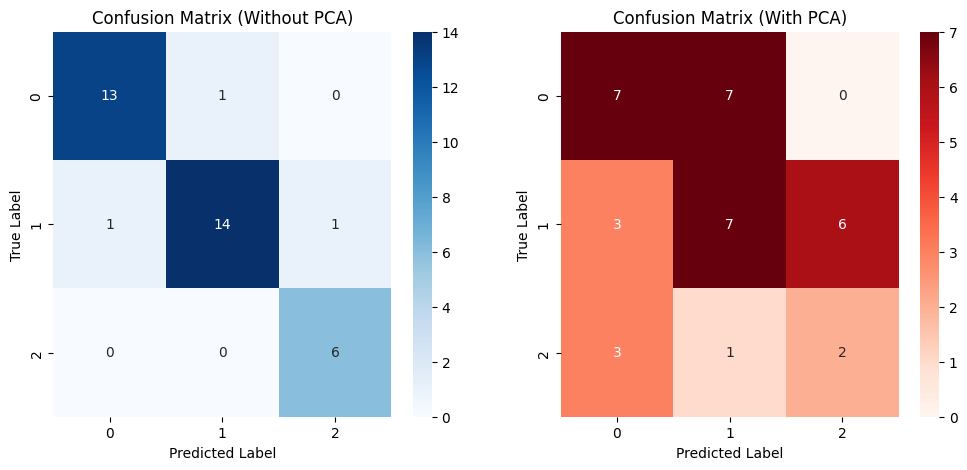

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_original), annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Confusion Matrix (Without PCA)")
ax[0].set_xlabel("Predicted Label")
ax[0].set_ylabel("True Label")

sns.heatmap(confusion_matrix(y_test, y_pred_pca), annot=True, fmt="d", cmap="Reds", ax=ax[1])
ax[1].set_title("Confusion Matrix (With PCA)")
ax[1].set_xlabel("Predicted Label")
ax[1].set_ylabel("True Label")

plt.show()

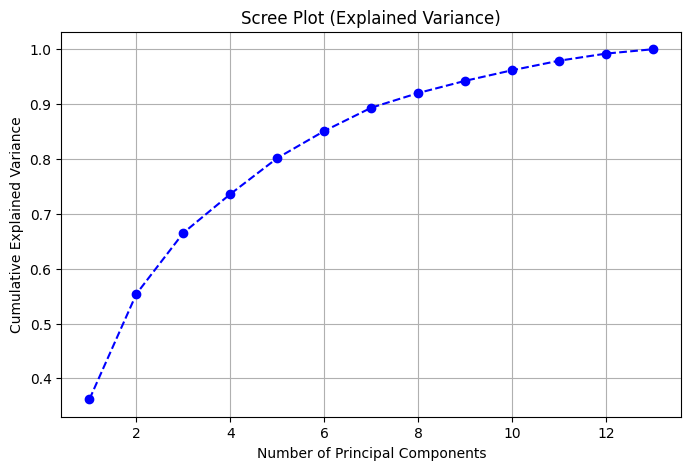

In [15]:
pca = PCA(n_components=X.shape[1])  # Keeping all components for variance analysis
X_pca = pca.fit_transform(X_scaled)

# Scree plot (explained variance ratio)
plt.figure(figsize=(8,5))
plt.plot(range(1, X.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot (Explained Variance)')
plt.grid()
plt.show()


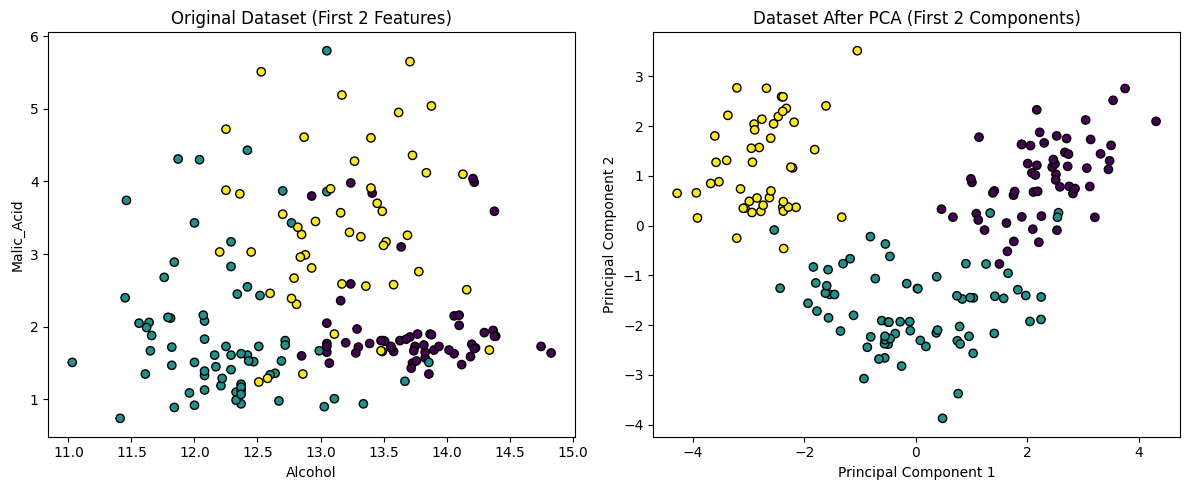

In [13]:
X = df.drop(columns=["Customer_Segment"])  # Features
y = df["Customer_Segment"]  # Target labels

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Reducing to 2D for visualization
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', edgecolor='k')
axes[0].set_xlabel(df.columns[0])
axes[0].set_ylabel(df.columns[1])
axes[0].set_title("Original Dataset (First 2 Features)")

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].set_title("Dataset After PCA (First 2 Components)")

plt.tight_layout()
plt.show()
